In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
solar=pd.read_csv("/content/SolarPrediction.csv",parse_dates=['Date'],index_col='Date')
solar

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Date,,,,,,,,,,
2016-09-29,1475229326,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
2016-09-29,1475229023,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2016-09-29,1475228726,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2016-09-29,1475228421,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
2016-09-29,1475228124,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
2016-12-01,1480587604,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
2016-12-01,1480587301,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
2016-12-01,1480587001,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00


In [ ]:
solar.isnull().sum()

UNIXTime                  0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [ ]:
solar.drop_duplicates()

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Date,,,,,,,,,,
2016-09-29,1475229326,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
2016-09-29,1475229023,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2016-09-29,1475228726,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2016-09-29,1475228421,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
2016-09-29,1475228124,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
2016-12-01,1480587604,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
2016-12-01,1480587301,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
2016-12-01,1480587001,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00


In [ ]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32686 entries, 2016-09-29 to 2016-12-01
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  int64  
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  int64  
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   TimeSunRise             32686 non-null  object 
 9   TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


**#correlation**

In [ ]:
correlation = solar.corr()
correlation

<ipython-input-6-b28d8ccf2689>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = solar.corr()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


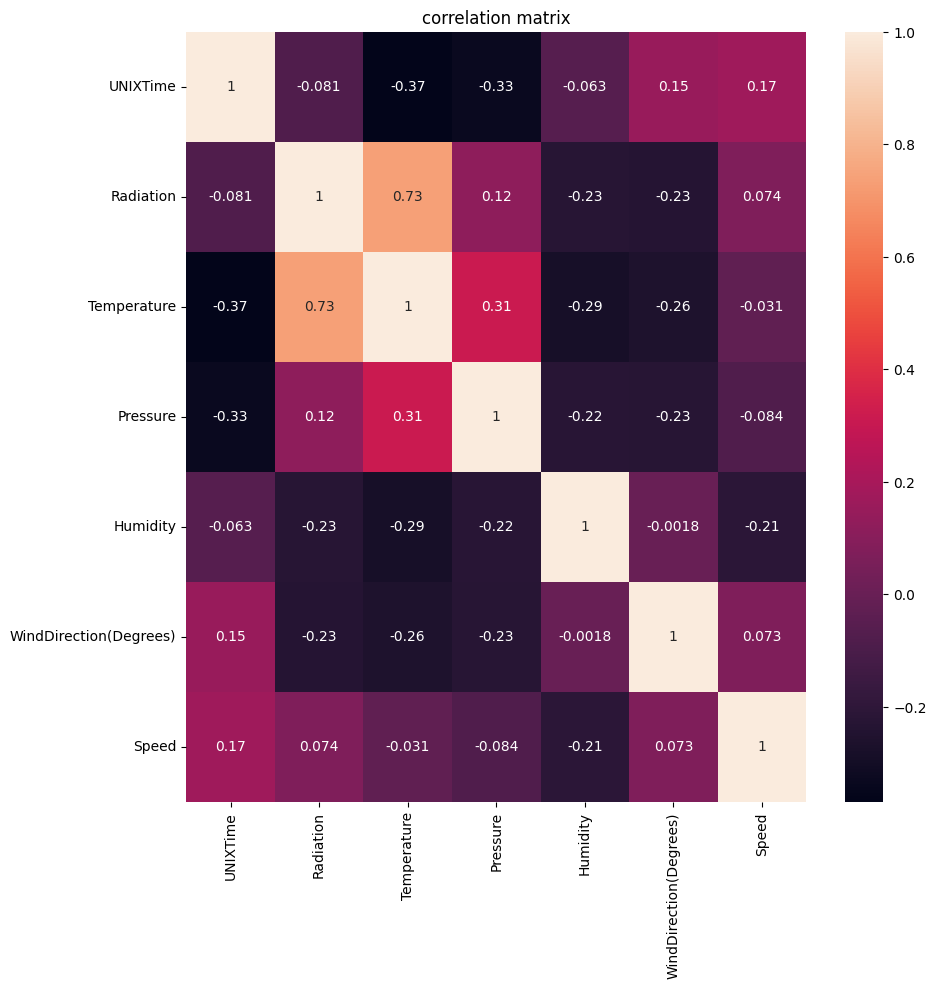

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.title('correlation matrix')
plt.show()

**#plots**

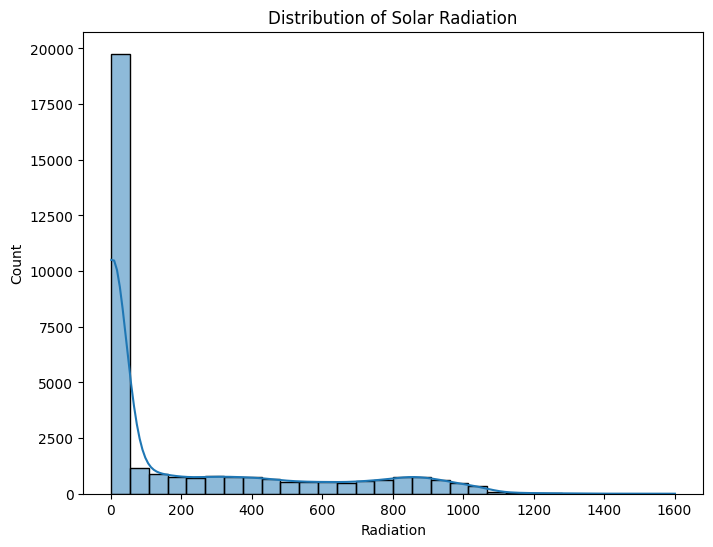

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(solar['Radiation'], bins=30, kde=True)
plt.title('Distribution of Solar Radiation')
plt.show()

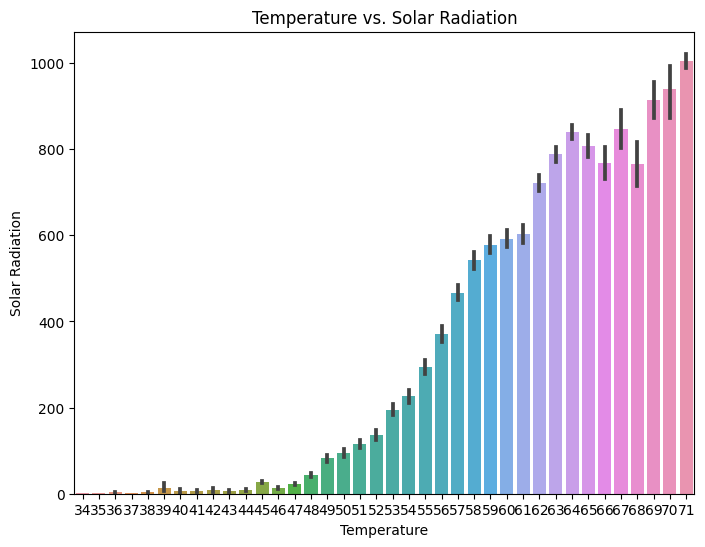

In [ ]:
x=plt.figure(figsize=(8, 6))
sns.barplot(x='Temperature', y='Radiation', data=solar)
plt.title('Temperature vs. Solar Radiation')
plt.xlabel('Temperature')
plt.ylabel('Solar Radiation')
plt.show()

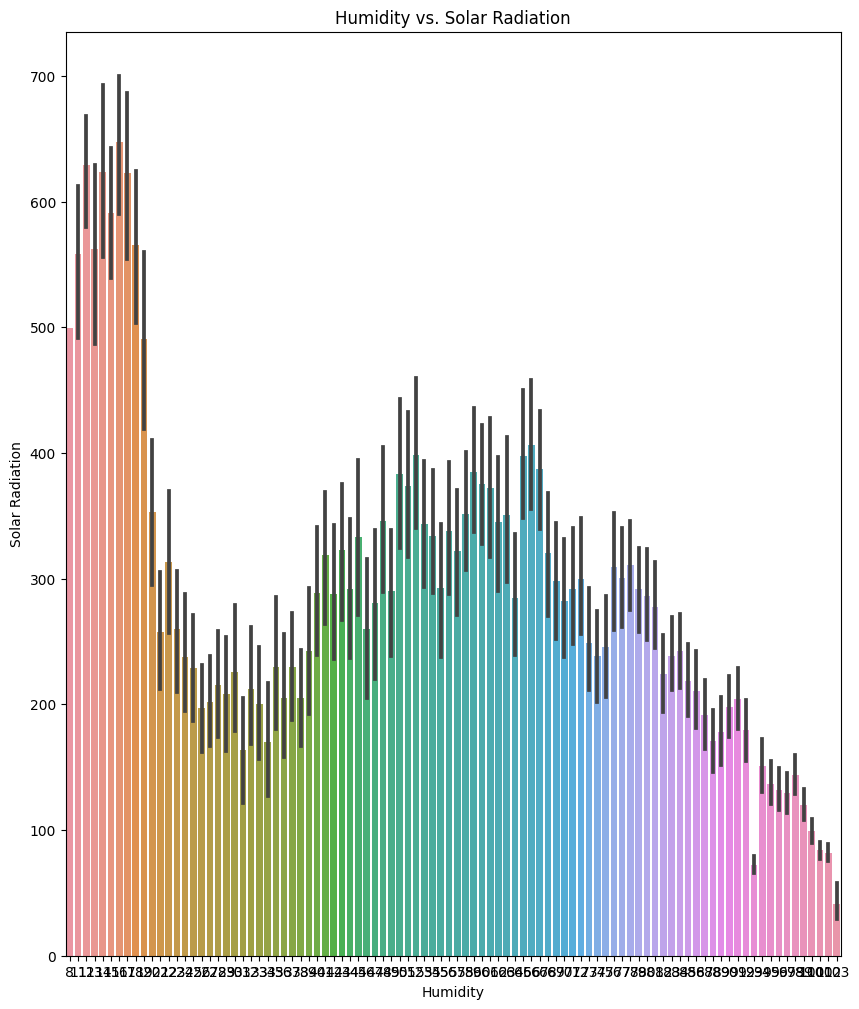

In [ ]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Humidity', y='Radiation', data=solar)
plt.title('Humidity vs. Solar Radiation')
plt.xlabel('Humidity')
plt.ylabel('Solar Radiation')
plt.show()

<Axes: >

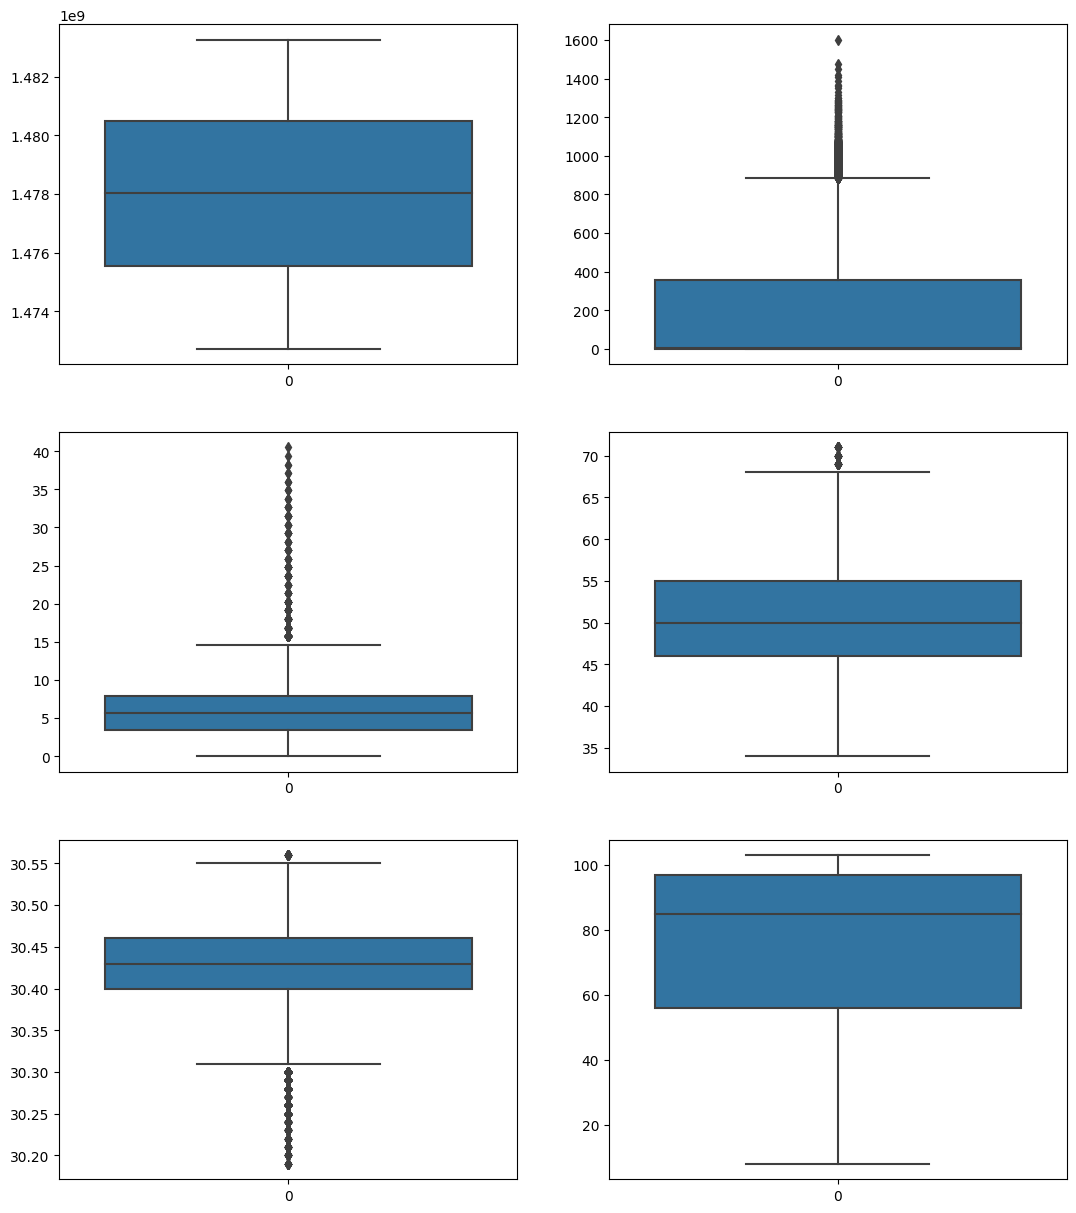

In [ ]:
fig, axes  = plt.subplots(3,2,figsize=(13,15))
sns.boxplot(solar["UNIXTime"], ax=axes[0,0])
sns.boxplot(solar["Radiation"],ax=axes[0,1])
sns.boxplot(solar["Speed"],ax=axes[1,0])
sns.boxplot(solar["Temperature"],ax=axes[1,1])
sns.boxplot(solar["Pressure"],ax=axes[2,0])
sns.boxplot(solar["Humidity"],ax=axes[2,1])




**#removing** **outliers**

In [ ]:
Q3 = solar.Speed.quantile(.75)
Q3

7.87

In [ ]:
Q1 = solar.Speed.quantile(.25)
Q1

3.37

In [ ]:
IQR_value = Q3 - Q1
IQR_value

4.5

In [ ]:
lower_limit = Q1 - 1.5*IQR_value
lower_limit

-3.38

In [ ]:
upper_limit = Q3 + 1.5*IQR_value
upper_limit

14.620000000000001

In [ ]:
data=solar[~((solar.Speed<lower_limit)|(solar.Speed>upper_limit))]
data

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Date,,,,,,,,,,
2016-09-29,1475229326,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
2016-09-29,1475229023,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2016-09-29,1475228726,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2016-09-29,1475228421,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
2016-09-29,1475228124,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
2016-12-01,1480587604,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
2016-12-01,1480587301,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
2016-12-01,1480587001,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00


**#label** **encoding**

In [ ]:

encoder=LabelEncoder()
for i in data:
  data[i]=encoder.fit_transform(data[i])

<ipython-input-16-82d415f42274>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=encoder.fit_transform(data[i])
<ipython-input-16-82d415f42274>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=encoder.fit_transform(data[i])
<ipython-input-16-82d415f42274>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32207 entries, 2016-09-29 to 2016-12-01
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   UNIXTime                32207 non-null  int64
 1   Time                    32207 non-null  int64
 2   Radiation               32207 non-null  int64
 3   Temperature             32207 non-null  int64
 4   Pressure                32207 non-null  int64
 5   Humidity                32207 non-null  int64
 6   WindDirection(Degrees)  32207 non-null  int64
 7   Speed                   32207 non-null  int64
 8   TimeSunRise             32207 non-null  int64
 9   TimeSunSet              32207 non-null  int64
dtypes: int64(10)
memory usage: 2.7 MB


**#Linear** **Regression**

In [ ]:
#LinearRegression

x=data.drop("Radiation",axis=1)
y=data['Radiation']
scaler= StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(y_test,pred)
print("mse:",mse)
print("r2_score:",r2)
print("mae:",mae)

mse: 6658960.836036153
r2_score: 0.6650532742134085
mae: 2032.3489991728463


**#Decision** **Tree**

In [ ]:
#DecisionTree

decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
prediction=decision_tree.predict(x_test)
MSE=mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
MAE=mean_absolute_error(y_test,prediction)


print("mse:",mse)
print("r2_score:",r2)
print("mae:",mae)

mse: 6658960.836036153
r2_score: 0.9379421415878247
mae: 2032.3489991728463


**#decision** **tree** **hyper** **parameter** **tuning**

In [ ]:


PARAMS={'max_depth':[10,20,30],
        'min_samples_split':[5,10,15],
        'min_samples_leaf':[10,15,20]}
grid_search=GridSearchCV(estimator=decision_tree,param_grid=PARAMS,cv=5)
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_rf=grid_search.best_estimator_

print("best params:",best_params)

best params: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [ ]:
test=best_rf.score(x_test,y_test)
print("test accuracy:",test)

test accuracy: 0.9482148365542987


**#RandomForest**

In [ ]:
#RandomForest

random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("mse:",mse)
print("r2:",r2)
print("mae:",mae)

mse: 718297.7738992239
r2: 0.9638695145636931
mae: 352.7027103384043


**#Random** **forest** **hyper** **parameter** **tuning**

In [ ]:

PARAMS={'n_estimators':[10,20,30],
        'max_depth':[10,20,30],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(estimator=random_forest,param_grid=PARAMS,cv=5)
grid_search.fit(x_train,y_train)

best_param=grid_search.best_params_
best_rf_=grid_search.best_estimator_
print("best params:",best_param)

best params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}


In [ ]:
test_accuracy=best_rf_.score(x_test,y_test)
print("test accuracy:",test_accuracy)

test accuracy: 0.9622827170994981


**#xg** **boost**

In [ ]:
#xgboost

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xg=xgb.predict(x_test)

mse = mean_squared_error(y_test, y_pred_xg)
r2=r2_score(y_test,y_pred_xg)
mae=mean_absolute_error(y_test,y_pred_xg)

print("mse:",mse)
print("r2:",r2)
print("mae:",mae)




mse: 833568.7675674411
r2: 0.9580713663453715
mae: 451.047511458379


**#Catboost**

In [ ]:
#catboost

!pip install catboost
from catboost import CatBoostRegressor
!pip install catboost
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=9,
                                   verbose=100)

catboost_model.fit(x_train, y_train)

predictions_cb = catboost_model.predict(x_test)

mse= mean_squared_error(y_test,predictions_cb )
r2=r2_score(y_test,predictions_cb)
mae=mean_absolute_error(y_test,predictions_cb)
print("mse:",mse)
print("r2:",r2)
print("mae:",mae)

0:	learn: 4101.2182514	total: 14.7ms	remaining: 14.7s
100:	learn: 905.7975008	total: 1.45s	remaining: 12.9s
200:	learn: 773.9083367	total: 2.88s	remaining: 11.5s
300:	learn: 696.2564413	total: 5.58s	remaining: 13s
400:	learn: 639.5009001	total: 8.2s	remaining: 12.2s
500:	learn: 592.2246077	total: 9.7s	remaining: 9.66s
600:	learn: 553.1224298	total: 11.1s	remaining: 7.39s
700:	learn: 521.0713830	total: 12.6s	remaining: 5.36s
800:	learn: 492.9621816	total: 14s	remaining: 3.48s
900:	learn: 467.4556192	total: 15.4s	remaining: 1.7s
999:	learn: 445.2231780	total: 16.9s	remaining: 0us
mse: 709619.116371444
r2: 0.9643060523350856
mae: 390.5379543814706


**#SVM**

In [ ]:
#svm
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

svr = SVR(kernel='linear', C=250)

svr.fit(x_train, y_train)

predictions_svr = svr.predict(x_test)

mse = mean_squared_error(y_test, predictions_svr)
r2=r2_score(y_test,predictions_svr)
mae=mean_absolute_error(y_test,predictions_svr)
print("mse:",mse)
print("r2:",r2)
print("mae:",mae)


mse: 6876758.129478956
r2: 0.6540980377853665
mae: 2015.8528168181779


**solution**

In [ ]:
from ctypes import c_void_p
scores=['MSE','MAE','R2 SCORE']
name=['linear regression','decision tree','random forest','xg_boost','cat_boost','svm']
pred=[pred,prediction,y_pred,y_pred_xg,predictions_cb,predictions_svr]
mse=[]
mae=[]
r2=[]

for j in pred:
  mse.append(mean_squared_error(y_test,j))
  mae.append(mean_absolute_error(y_test,j))
  r2.append(r2_score(y_test,j))
eval_scores=pd.DataFrame(
    {'Models':name,
     'MSE':mse,
     'MAE':mae,
     'R2':r2}
)

eval_scores


,Models,MSE,MAE,R2
0,linear regression,6.658961e+06,2032.348999,0.665053
1,decision tree,1.221973e+06,436.098417,0.938535
2,random forest,7.360616e+05,355.945346,0.962976
3,xg_boost,8.335688e+05,451.047511,0.958071
4,cat_boost,7.096191e+05,390.537954,0.964306
5,svm,6.876758e+06,2015.852817,0.654098
